In [1]:
using Pkg
Pkg.activate("..")
using ElementalFunctionsTests

  Activating project at `~/Documents/Academia/taylor/ElementalFunctionsTests`


In [2]:
using JSON
import Unmarshal
using Plots
using Printf
using PrettyTables
include("setupPlots.jl")

setupLabels (generic function with 1 method)

In [3]:
function inrange(x, a=-Inf, b=Inf)
    return a < x ≤ b
end

inrange (generic function with 3 methods)

In [4]:
function filterResults(errors, a, b)
    return filter((x)->inrange(abs(x.maxError.err),a, b), errors)
end

filterResults (generic function with 1 method)

# Float64

In [5]:
Unmarshal.unmarshal(T::Type{ElementalFunctionsTests.AbstractError}, x::Error, verbose::Bool, verboseLvl::Int64) = x
Unmarshal.unmarshal(T::Type{StepRangeLen}, br::Vector{Any}, verbose::Bool, verboseLvl::Int64) =  range(first(br), last(br), length=length(br))
function Unmarshal.unmarshal(DT::Type{ElementalFunctionsTests.AbstractError}, parsedJson::Dict{String, Any}, verbose::Bool, verboseLvl::Int64)
    parsedJson["x"] = eval(Meta.parse(parsedJson["x"])) 
    return Unmarshal.unmarshal(Error, parsedJson)
end

In [23]:
default(size=(900,900))
function logtolerant(arr)
    map(x-> x != 0 ? x : 0.0001, arr)
end

logtolerant (generic function with 1 method)

### Distribución de números flotantes

In [6]:
RFD = JSON.parsefile("Float64Errors_FloatDistribution.json")
RFD = Unmarshal.unmarshal(Array{TestsResults}, RFD)
nothing

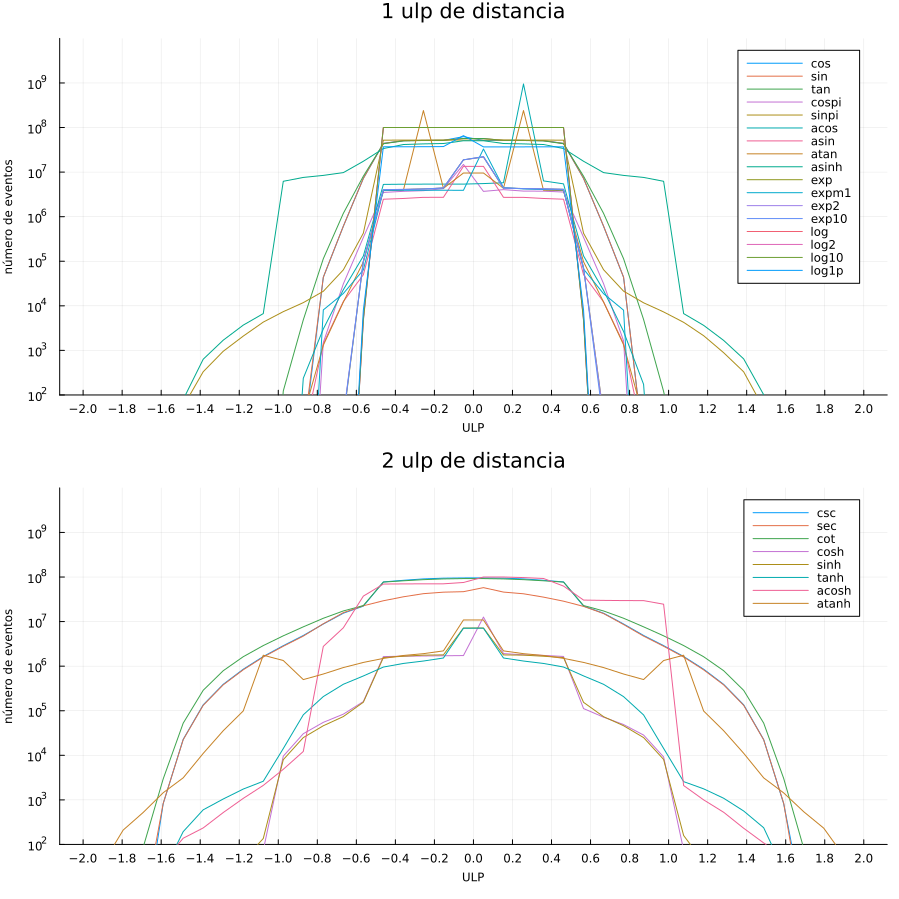

In [155]:
correct = filterResults(RFD, prevfloat(0.0), 0.5)
ulp1 = filterResults(RFD, 0.5, 1.5)
ulp2 = filterResults(RFD, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ]
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
p = plot(p2, p3, layout = l, xticks = -2:0.2:2, size=(900,900),  guidefont=font(8), yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10))
xlabel!("ULP")
ylabel!("número de eventos")
savefig("images/hist_RFD.png")
p

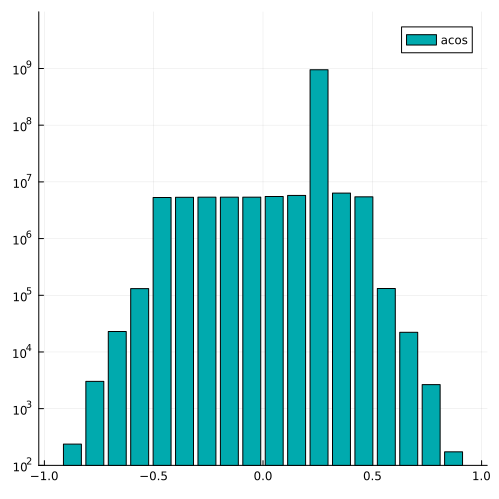

In [169]:
lupa = 12:29 
p = bar(r[lupa], RFD[6].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^10), size=(500,500), label="acos", color=palette(:default)[6])
savefig("images/acos_RFD")
p

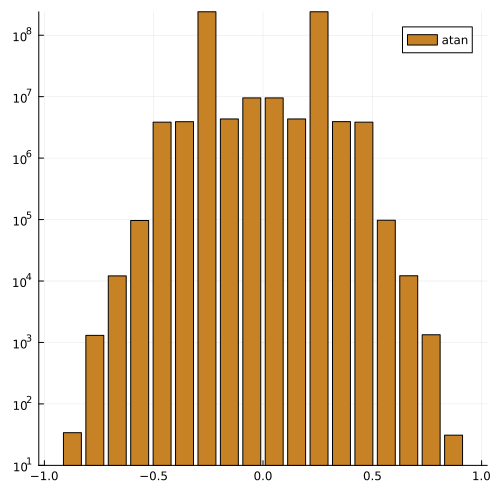

In [170]:
lupa = 12:29 
p = bar(r[lupa], RFD[8].buckets[lupa], yscale=:log10, yticks=exp10.(1:9), size=(500,500), label="atan", color=palette(:default)[8])
savefig("images/atan_RFD")
p

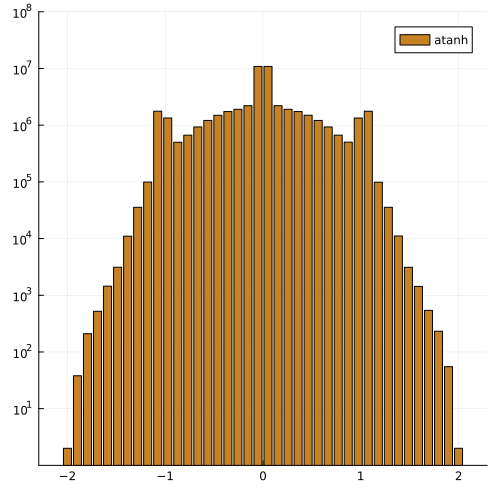

In [171]:
p = bar(r, RFD[17].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(1, 10^8), label="atanh", color=palette(:default)[8])
savefig("images/atanh_RFD")
p

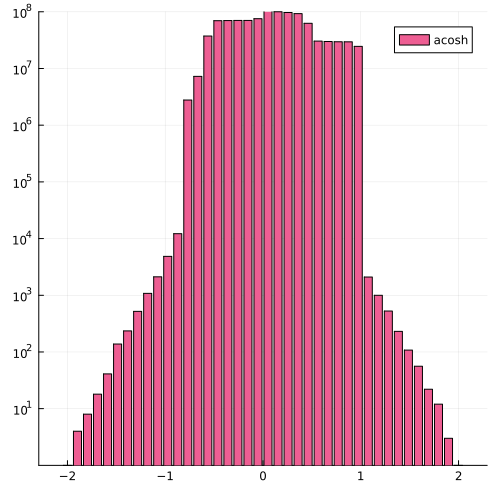

In [172]:
p = bar(r, RFD[15].buckets, size=(500,500),  yscale=:log10, yticks=exp10.(1:9), ylims=(1, 10^8), label="acosh", color=palette(:default)[7])
savefig("images/acosh_RFD")
p

### Probabilidad de error

In [33]:
p = vcat(
        sort(
            map(foo->begin 
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/foo.batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / foo.batchsize*100 
                return [foo.f incorrectos ulp2]
            end, RFD), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"])#, backend = Val(:latex))


┌─────────┬──────────────┬──────────────┐
│ función │ P(err=1 ULP) │ P(err=2 ULP) │
├─────────┼──────────────┼──────────────┤
│   acosh │      19.1439 │      1.66e-5 │
│     cot │      14.0448 │     0.000613 │
│     csc │      11.4682 │    0.0001643 │
│     sec │      11.4111 │     0.000167 │
│   asinh │      9.90046 │          0.0 │
│     tan │      1.88146 │          0.0 │
│     sin │      1.57756 │          0.0 │
│     cos │      1.57625 │          0.0 │
│   atanh │      1.31265 │    0.0004481 │
│    tanh │     0.261047 │       5.0e-6 │
│   sinpi │     0.107718 │          0.0 │
│   cospi │    0.0751822 │          0.0 │
│    sinh │    0.0616022 │       1.3e-6 │
│    cosh │    0.0610112 │       1.3e-6 │
│    acos │    0.0313909 │          0.0 │
│    atan │    0.0221029 │          0.0 │
│   expm1 │    0.0184198 │          0.0 │
│   exp10 │    0.0171507 │          0.0 │
│    exp2 │    0.0170936 │          0.0 │
│     exp │    0.0170447 │          0.0 │
│    asin │    0.0127216 │        

## Sección Gamma

In [86]:
γ = JSON.parsefile("Float64Errors_GammaSection.json")
γ = Unmarshal.unmarshal(Array{TestsResults}, γ)
nothing

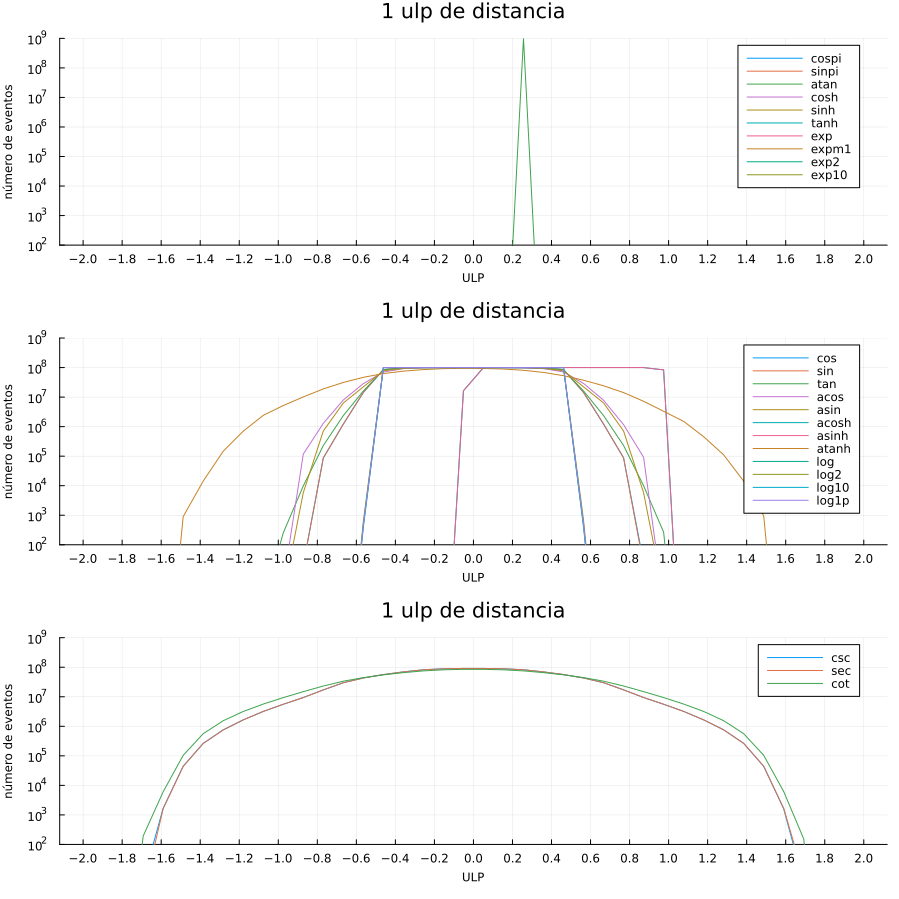

In [182]:
correct = filterResults(γ, prevfloat(0.0), 0.5)
ulp1 = filterResults(γ, 0.5, 1.5)
ulp2 = filterResults(γ, 1.5, 2.5)
r =  range(-2, 2, length=40)
l = @layout [a ; b ; c]
p1 = plot(r, logtolerant(setupBuckets(correct)), label=setupLabels(correct))
title!("correctamente redondeados")
p2 = plot(r, logtolerant(setupBuckets(ulp1)), label=setupLabels(ulp1))
title!("1 ulp de distancia")
p3 = plot(r, logtolerant(setupBuckets(ulp2)), label=setupLabels(ulp2))
title!("2 ulp de distancia")
p = plot(p1, p2, p3, layout = l,  guidefont=font(8), xticks = -2:0.2:2,yscale=:log10, yticks=exp10.(1:9), ylims=(100, 10^9)) 
xlabel!("ULP")
ylabel!("número de eventos")
savefig("images/hist_gamma.png")
p

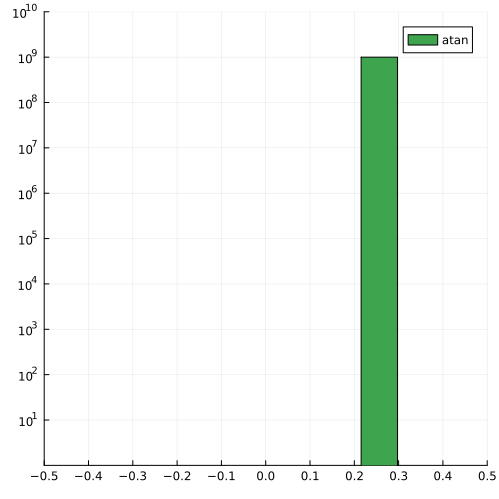

In [168]:
p = bar(r, logtolerant(γ[8].buckets), 
    size=(500,500), 
    xticks = -0.5:0.1:0.5, xlims=(-0.5, 0.5),  
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^10), 
    label="atan", 
    color=palette(:default)[3])
savefig("images/atan_gamma")
p

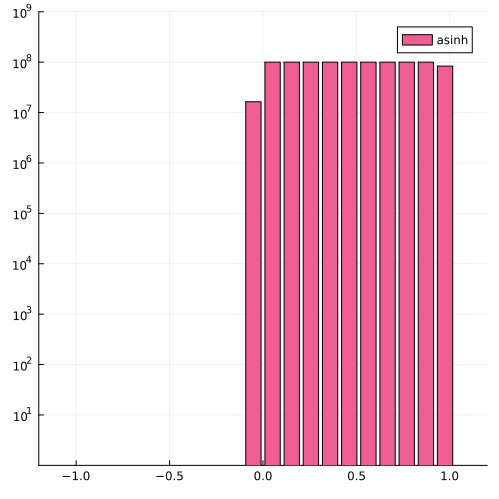

In [176]:
p = bar(r, 
    logtolerant(γ[16].buckets), 
    size=(500,500), 
    yscale=:log10, yticks=exp10.(1:11), ylims=(1, 10^9), 
    xlims=(-1.2, 1.2),
    label="asinh", 
    color=palette(:default)[7])
# savefig("images/acos_gamma")
p

### Probabilidad de error

In [180]:
p = vcat(
        sort(
            map(foo->begin 
                incorrectos = (sum(foo.buckets[1:15]) + sum(foo.buckets[26:40]))/foo.batchsize*100
                ulp2 = (sum(foo.buckets[1:5]) + sum(foo.buckets[36:40])) / foo.batchsize*100 
                return [foo.f incorrectos ulp2]
            end, γ), 
        by=x->x[2], rev=true)...
)
pretty_table(p, header=["función", "P(err=1 ULP)", "P(err=2 ULP)"])#, backend = Val(:latex))

┌─────────┬──────────────┬──────────────┐
│ función │ P(err=1 ULP) │ P(err=2 ULP) │
├─────────┼──────────────┼──────────────┤
│   asinh │      48.3616 │          0.0 │
│   acosh │      48.3603 │          0.0 │
│     cot │      27.3947 │    0.0012614 │
│     sec │      22.2786 │    0.0003315 │
│     csc │      22.2771 │    0.0003307 │
│   atanh │      20.4182 │          0.0 │
│    acos │      7.63641 │          0.0 │
│    asin │      5.86846 │          0.0 │
│     tan │      3.75297 │          0.0 │
│     sin │      3.14231 │          0.0 │
│     cos │      3.14229 │          0.0 │
│    log2 │    0.0001306 │          0.0 │
│     log │      9.74e-5 │          0.0 │
│   log1p │      9.45e-5 │          0.0 │
│   log10 │      7.81e-5 │          0.0 │
│   cospi │          0.0 │          0.0 │
│   sinpi │          0.0 │          0.0 │
│    atan │          0.0 │          0.0 │
│    cosh │          0.0 │          0.0 │
│    sinh │          0.0 │          0.0 │
│    tanh │          0.0 │        